# Write a Python Program for frequency domain filtering for (HPF & BSF)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Read the image
image_path = "lena_colored.png"  # Replace with image name
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [6]:
def dft2D(image):
    # Perform 2D Discrete Fourier Transform
    return np.fft.fft2(image)

def idft2D(freq_domain):
    # Perform 2D Inverse Discrete Fourier Transform
    return np.fft.ifft2(freq_domain)

def hpf_filter(image_shape, cutoff_frequency):
    # Generate a High Pass Filter (HPF)
    return 1 - lpf_filter(image_shape, cutoff_frequency)

def bsf_filter(image_shape, cutoff_low, cutoff_high):
    # Generate a Band Stop Filter (BSF)
    return 1 - brf_filter(image_shape, cutoff_low, cutoff_high)

def lpf_filter(image_shape, cutoff_frequency):
    # Generate a Low Pass Filter (LPF)
    rows, cols = image_shape
    lpf = np.zeros((rows, cols))
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_frequency:
                lpf[i, j] = 1
    return lpf

def brf_filter(image_shape, cutoff_low, cutoff_high):
    # Generate a Band Reject Filter (BRF)
    rows, cols = image_shape
    brf = np.ones((rows, cols))
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if cutoff_low <= distance <= cutoff_high:
                brf[i, j] = 0
    return brf

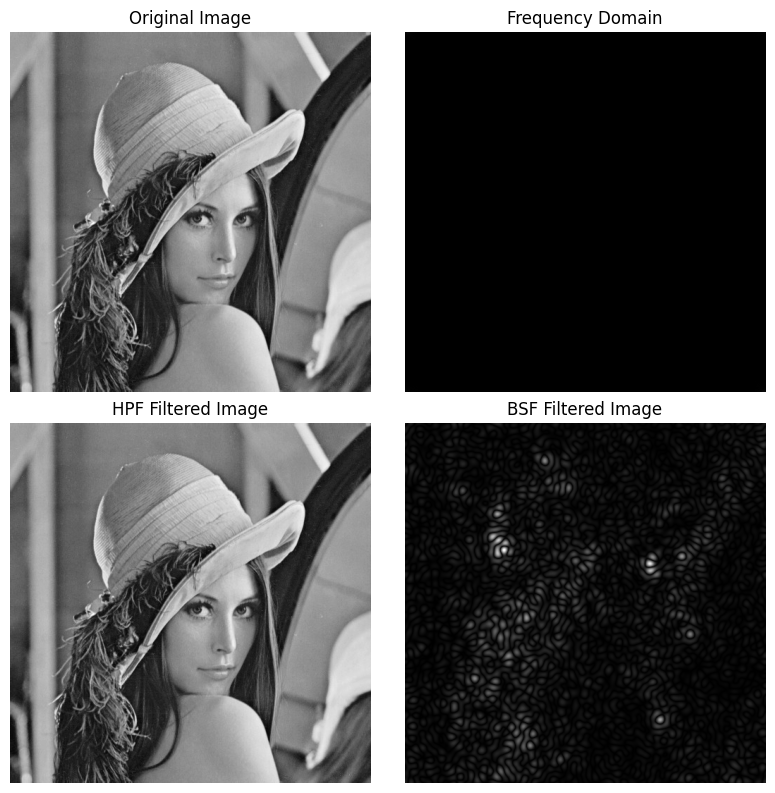

In [7]:
# Check if the image has been successfully loaded
if image is None:
    print("Error: Could not read the image.")
else:
    # Convert the image to grayscale if it's a color image
    if len(image.shape) > 2:
        image = np.mean(image, axis=2)

    # Perform 2D DFT
    freq_domain = dft2D(image)

    # Define the cutoff frequencies for HPF and BSF
    cutoff_hpf = 30
    cutoff_low_bsf = 20
    cutoff_high_bsf = 40

    # Apply HPF and BSF
    hpf = hpf_filter(image.shape, cutoff_hpf)
    bsf = bsf_filter(image.shape, cutoff_low_bsf, cutoff_high_bsf)
    filtered_freq_domain_hpf = freq_domain * hpf
    filtered_freq_domain_bsf = freq_domain * bsf

    # Reconstruct images using IDFT
    filtered_image_hpf = np.abs(idft2D(filtered_freq_domain_hpf))
    filtered_image_bsf = np.abs(idft2D(filtered_freq_domain_bsf))

    # Display the original and filtered images
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(np.abs(freq_domain), cmap='gray')
    plt.title('Frequency Domain')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(filtered_image_hpf, cmap='gray')
    plt.title('HPF Filtered Image')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(filtered_image_bsf, cmap='gray')
    plt.title('BSF Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()